In [2]:
import numpy as np
import pandas as pd

import warnings
warnings.filterwarnings("ignore") # çıkan uyarıları görmezden gelerek daha temiz bir çıktı almamamızı sağlar

## Pandas Serileri Üretmek

In [2]:
pd.Series()

Series([], dtype: object)

In [3]:
liste = [1,2,3,4,5]
seri = pd.Series(liste)
seri

0    1
1    2
2    3
3    4
4    5
dtype: int64

In [4]:
type(seri)

pandas.core.series.Series

In [5]:
seri.dtype

dtype('int64')

### Array ile Seri Oluşturmak

In [7]:
arr = np.array([1,2,5.6,"array"])
arr

array(['1', '2', '5.6', 'array'], dtype='<U32')

In [9]:
seri = pd.Series(arr)
seri

0        1
1        2
2      5.6
3    array
dtype: object

In [10]:
seri.apply(type)

0    <class 'str'>
1    <class 'str'>
2    <class 'str'>
3    <class 'str'>
dtype: object

In [ ]:
#tip dönüşümü
seri = pd.Series([1,2,3.7,8.9]).astype(int)
seri

0    1
1    2
2    3
3    8
dtype: int32

In [12]:
seri3 = pd.Series([1,2,3.7,8.9])
seri3

0    1.0
1    2.0
2    3.7
3    8.9
dtype: float64

In [13]:
seri4 = pd.Series([1,2,3.7,8.9], dtype = "str")
seri4

0      1
1      2
2    3.7
3    8.9
dtype: object

In [14]:
seri = pd.Series([1,2,3], dtype = float)
seri

0    1.0
1    2.0
2    3.0
dtype: float64

In [ ]:
#içine listeyi verdik ve indeks atadık

seri = pd.Series(data = liste, index = ["a","b","c","d","e"])
seri

a    1
b    2
c    3
d    4
e    5
dtype: int64

In [16]:
# 5 elemanlı listeye 6 indeks atamaya çalıştığımız için hata verdi
seri = pd.Series(data = liste, index = ["a","b","c","d","e","f"])
seri

ValueError: Length of values (5) does not match length of index (6)

In [19]:
arr = np.arange(12).reshape(4,3)
arr

array([[ 0,  1,  2],
       [ 3,  4,  5],
       [ 6,  7,  8],
       [ 9, 10, 11]])

In [ ]:
#Seriler tek boyultlu olduğu için, ama bizim array'imiz iki boyutlu olduğu için hata verir
seri = pd.Series(arr)

ValueError: Data must be 1-dimensional, got ndarray of shape (4, 3) instead

In [21]:
arr_1d = np.arange(5)
arr_1d

array([0, 1, 2, 3, 4])

In [ ]:
#array'den Seri oluşturma 1. yöntem
seri = pd.Series(arr_1d)
seri

0    0
1    1
2    2
3    3
4    4
dtype: int32

In [23]:
# 2. Yöntem
pd.Series(np.arange(5))

0    0
1    1
2    2
3    3
4    4
dtype: int32

In [24]:
pd.Series(np.arange(10,50,10), index= [1,2,3,4])

1    10
2    20
3    30
4    40
dtype: int32

In [25]:
pd.Series(np.arange(10,50,10), index = np.arange(1,5))

1    10
2    20
3    30
4    40
dtype: int32

In [26]:
pd.Series(np.arange(10,50,10), index = ("1","2","3","4"))

1    10
2    20
3    30
4    40
dtype: int32

## Sözlük ile Seri Oluşturmak

In [27]:
dict = {"resim" : 75, "fen": 90, "mat": 80}

In [29]:
seri = pd.Series(dict)
seri

resim    75
fen      90
mat      80
dtype: int64

In [30]:
seri_new = pd.Series(dict, index = ["resim", "müzik", "mat"]) # NaN değerden dolayı dtype : float oldu.
                                                            # müzik key dict içerisinde olmadığı için NaN değer döndü 
seri_new

resim    75.0
müzik     NaN
mat      80.0
dtype: float64

In [31]:
dict

{'resim': 75, 'fen': 90, 'mat': 80}

In [33]:
seri = pd.Series(dict, index = ["x", "fen","mat"])
seri

x       NaN
fen    90.0
mat    80.0
dtype: float64

In [34]:
seri2 = pd.concat([seri,seri])
seri2

x       NaN
fen    90.0
mat    80.0
x       NaN
fen    90.0
mat    80.0
dtype: float64

In [35]:
x = pd.Series([356,357,358])
y = pd.Series(["Mustafa", "Safiye","Muhammed","Yasemin"])
new = pd.concat((x,y))
new

0         356
1         357
2         358
0     Mustafa
1      Safiye
2    Muhammed
3     Yasemin
dtype: object

## Pandas Serilerinde Indexing ve Slicing

In [36]:
seri = pd.Series([1,2,3,4], index = ["python", "git", "numpy", "pandas"])
seri

python    1
git       2
numpy     3
pandas    4
dtype: int64

In [ ]:
seri[3] # 3. index label'a karşılık gelen value çıktı olarak verildi.

4

In [ ]:
seri["pandas"] # pandas index label'ına denk gelen value değerini çıktı olarak aldık 

4

In [ ]:
seri.index[3] # 3. indexe karşılık gelen index label'ı çıktı olarak verdi.

'pandas'

In [ ]:
seri[2:] # slicing ile çalıştığımızda hem index hemde value değerini çıktı olarak verir

numpy     3
pandas    4
dtype: int64

In [ ]:
seri[[2,3]] #iki adet indeks verdiğimiz için bir parantez daha gerekti

numpy     3
pandas    4
dtype: int64

In [44]:
seri[["git", "pandas"]]

git       2
pandas    4
dtype: int64

In [45]:
seri["git":"pandas"]

git       2
numpy     3
pandas    4
dtype: int64

In [46]:
seri[[0,3,2]]

python    1
pandas    4
numpy     3
dtype: int64

In [47]:
seri[::-1]

pandas    4
numpy     3
git       2
python    1
dtype: int64

## Pandas Serilerinde Kullanılan Attribute ve Metodlar

In [48]:
np.random.seed(42)
seri = pd.Series(np.random.randint(0,50,6))
seri

0    38
1    28
2    14
3    42
4     7
5    20
dtype: int32

In [49]:
seri.size

6

In [50]:
len(seri)

6

In [51]:
seri.ndim

1

In [52]:
seri.index

RangeIndex(start=0, stop=6, step=1)

In [53]:
seri.values

array([38, 28, 14, 42,  7, 20])

In [54]:
seri.items

<bound method Series.items of 0    38
1    28
2    14
3    42
4     7
5    20
dtype: int32>

In [56]:
list(seri.items())

[(0, 38), (1, 28), (2, 14), (3, 42), (4, 7), (5, 20)]

In [57]:
seri.head()

0    38
1    28
2    14
3    42
4     7
dtype: int32

In [58]:
seri.tail()

1    28
2    14
3    42
4     7
5    20
dtype: int32

In [59]:
seri.sample(3)

5    20
0    38
3    42
dtype: int32

In [ ]:
seri.sort_index() #sort'ta serinin indeksini baz aldı sıralama yaparken. Ascending = True da bu işin default'u

0    38
1    28
2    14
3    42
4     7
5    20
dtype: int32

In [61]:
seri.sort_index(ascending = False)

5    20
4     7
3    42
2    14
1    28
0    38
dtype: int32

In [62]:
seri.sort_values()

4     7
2    14
5    20
1    28
0    38
3    42
dtype: int32

In [63]:
car_brands = ['Toyota', 'Ford', 'BMW', 'Mercedes', 'Audi', 'Tesla', 'Honda', 'Nissan', 'Chevrolet', 'Hyundai']
seri = pd.Series(car_brands)
seri

0       Toyota
1         Ford
2          BMW
3     Mercedes
4         Audi
5        Tesla
6        Honda
7       Nissan
8    Chevrolet
9      Hyundai
dtype: object

In [ ]:
seri.isin(["Toyota","Mercedes"]) #Toyota ve Mercedes içinde mi değil mi diye baktık

0     True
1    False
2    False
3     True
4    False
5    False
6    False
7    False
8    False
9    False
dtype: bool

In [ ]:
seri[seri.isin(["Toyota","Mercedes"])] #bunu da ayrı seri yaptık

0      Toyota
3    Mercedes
dtype: object

# Data Frame'ler

In [66]:
data = [[1,2,3],[4,5,6]]

df = pd.DataFrame(data = data)
df

,0,1,2
0,1,2,3
1,4,5,6


In [67]:
data = [[1,2,3],[4,5,6]]
columns = ["A","B","C"]

df = pd.DataFrame(data = data, columns = columns)
df

,A,B,C
0,1,2,3
1,4,5,6


In [68]:
df.dtypes

A    int64
B    int64
C    int64
dtype: object

In [69]:
df.apply(type)

A    <class 'pandas.core.series.Series'>
B    <class 'pandas.core.series.Series'>
C    <class 'pandas.core.series.Series'>
dtype: object

In [70]:
arr = np.arange(1,27,3).reshape(3,3)
arr

array([[ 1,  4,  7],
       [10, 13, 16],
       [19, 22, 25]])

In [71]:
df = pd.DataFrame(arr)
df

,0,1,2
0,1,4,7
1,10,13,16
2,19,22,25


In [72]:
df = pd.DataFrame(arr, columns = ["A1","A2","A3"])
df

,A1,A2,A3
0,1,4,7
1,10,13,16
2,19,22,25


In [74]:
columns = ["A1","A2","A3"]
df = pd.DataFrame(arr, columns)
df

,0,1,2
A1,1,4,7
A2,10,13,16
A3,19,22,25


In [75]:
df = pd.DataFrame(arr, columns = ["A1","A2","A3"], index = ["B1","B2","B3"])
df

,A1,A2,A3
B1,1,4,7
B2,10,13,16
B3,19,22,25


In [76]:
df = pd.DataFrame(arr, ["A1","A2","A3"], ["B1","B2","B3"])
df

,B1,B2,B3
A1,1,4,7
A2,10,13,16
A3,19,22,25


## Sözlük Kullanarak DataFrame Üretme

In [3]:
data  = {"Name" : ["Zeliha", "Mustafa", "Ayşenur", "Yasemin"], "Age": [25, 33, 28, 33]} # kayler : columns, value : value
df = pd.DataFrame(data)
df

,Name,Age
0,Zeliha,25
1,Mustafa,33
2,Ayşenur,28
3,Yasemin,33


In [4]:
df.head()

,Name,Age
0,Zeliha,25
1,Mustafa,33
2,Ayşenur,28
3,Yasemin,33


In [5]:
df.columns

Index(['Name', 'Age'], dtype='object')

In [6]:
df.columns[1]

'Age'

In [7]:
df.index

RangeIndex(start=0, stop=4, step=1)

In [8]:
df.Age

0    25
1    33
2    28
3    33
Name: Age, dtype: int64

In [9]:
df.Name

0     Zeliha
1    Mustafa
2    Ayşenur
3    Yasemin
Name: Name, dtype: object

In [10]:
df.mean(numeric_only=True)

Age    29.75
dtype: float64

In [11]:
df.Age.mean()

29.75

In [12]:
df.Age.mode()
# en çok tekrar eden value çıktı olarak ekrana gelir. 
# 33 değeri 2 defa Age sütununda olup diğerleri 1 er defa olduğu için 33 çıktısını verdi

0    33
Name: Age, dtype: int64

In [13]:
df.Age.std()

3.947573094109004

In [14]:
df.std(numeric_only = True)

Age    3.947573
dtype: float64

In [15]:
df

,Name,Age
0,Zeliha,25
1,Mustafa,33
2,Ayşenur,28
3,Yasemin,33


In [16]:
# Sütunların isimlerini değiştirelim

df.columns = ["İsim", "Yaş"]
df

,İsim,Yaş
0,Zeliha,25
1,Mustafa,33
2,Ayşenur,28
3,Yasemin,33


In [17]:
df.index = ["a","b","c","d"]
df

,İsim,Yaş
a,Zeliha,25
b,Mustafa,33
c,Ayşenur,28
d,Yasemin,33


In [22]:
# değişikliği böyle de yapabiliriz ama kalıcı olmaz

df.rename(columns = {"İsim" : "Nom", "Yaş" : "Age"})

,Nom,Age
a,Zeliha,25
b,Mustafa,33
c,Ayşenur,28
d,Yasemin,33


In [19]:
df

,İsim,Yaş
a,Zeliha,25
b,Mustafa,33
c,Ayşenur,28
d,Yasemin,33


In [20]:
# şimdi kalıcı olur

df.rename(columns = {"İsim" : "Nom", "Yaş" : "Age"}, inplace =True)
df

,Nom,Age
a,Zeliha,25
b,Mustafa,33
c,Ayşenur,28
d,Yasemin,33


In [21]:
df.columns = ["İsim", "Yaş"]
df

,İsim,Yaş
a,Zeliha,25
b,Mustafa,33
c,Ayşenur,28
d,Yasemin,33


In [23]:
df.shape

(4, 2)

In [ ]:
df.shape[0] # sadece satır sayısını alır

4

In [25]:
df.shape[1]

2

In [26]:
df.ndim

2

In [27]:
df.size

8

In [28]:
"İsim" in df

True

In [29]:
"Name" in df

False

In [31]:
df.İsim == "Zeliha"

a     True
b    False
c    False
d    False
Name: İsim, dtype: bool

In [ ]:
# İsim sütununda Zeliha olan satırları getirme.

df[df.İsim == "Zeliha"]

,İsim,Yaş
a,Zeliha,25


## DF'lerde Indexing, Slicing

In [34]:
data={"isim":["Cem", "Ali", "Ayşe", "Fatma", "Veli","Seda", "Fatih"], "boy-m":[1.78, 1.70,1.60,1.70,1.80,1.65,1.85], "kilo-kg":[75,70, 55, 60, 80,72,83], "yas" : [18,45,25,30,29,35,50]}

In [35]:
df = pd.DataFrame(data, index = ["A", "B", "C", "D", "E", "F", "G"])
df

,isim,boy-m,kilo-kg,yas
A,Cem,1.78,75,18
B,Ali,1.70,70,45
C,Ayşe,1.60,55,25
D,Fatma,1.70,60,30
E,Veli,1.80,80,29
F,Seda,1.65,72,35
G,Fatih,1.85,83,50


In [36]:
df.isim 

A      Cem
B      Ali
C     Ayşe
D    Fatma
E     Veli
F     Seda
G    Fatih
Name: isim, dtype: object

In [37]:
df[["kilo-kg", "boy-m"]] # birden fazla sütunu çağırırken sütun label'larını liste içerisinde verdik 

,kilo-kg,boy-m
A,75,1.78
B,70,1.70
C,55,1.60
D,60,1.70
E,80,1.80
F,72,1.65
G,83,1.85


In [38]:
df[0:2]

,isim,boy-m,kilo-kg,yas
A,Cem,1.78,75,18
B,Ali,1.70,70,45


In [39]:
df["A":"C"]

,isim,boy-m,kilo-kg,yas
A,Cem,1.78,75,18
B,Ali,1.70,70,45
C,Ayşe,1.60,55,25


In [41]:
df["isim"]["B"]

'Ali'

In [42]:
df["A":"C"]["isim"]

A     Cem
B     Ali
C    Ayşe
Name: isim, dtype: object

In [43]:
df

,isim,boy-m,kilo-kg,yas
A,Cem,1.78,75,18
B,Ali,1.70,70,45
C,Ayşe,1.60,55,25
D,Fatma,1.70,60,30
E,Veli,1.80,80,29
F,Seda,1.65,72,35
G,Fatih,1.85,83,50


In [ ]:
# Yeni sütun eklemek

df["BMI"] = df["kilo-kg"] / (df["boy-m"]**2)
df 

,isim,boy-m,kilo-kg,yas,BMI
A,Cem,1.78,75,18,23.671254
B,Ali,1.70,70,45,24.221453
C,Ayşe,1.60,55,25,21.484375
D,Fatma,1.70,60,30,20.761246
E,Veli,1.80,80,29,24.691358
F,Seda,1.65,72,35,26.446281
G,Fatih,1.85,83,50,24.251278


In [45]:
#sütun silmek:
#önce öylesine bir sütun oluşturalım:

df["new"] = np.arange(1,8) 
df 

,isim,boy-m,kilo-kg,yas,BMI,new
A,Cem,1.78,75,18,23.671254,1
B,Ali,1.70,70,45,24.221453,2
C,Ayşe,1.60,55,25,21.484375,3
D,Fatma,1.70,60,30,20.761246,4
E,Veli,1.80,80,29,24.691358,5
F,Seda,1.65,72,35,26.446281,6
G,Fatih,1.85,83,50,24.251278,7


In [ ]:
df.drop("new") #bu çalışmaz çünkü defaultta axis = 0, yani satır olarak algılar.

In [47]:
df.drop("new", axis = 1)

,isim,boy-m,kilo-kg,yas,BMI
A,Cem,1.78,75,18,23.671254
B,Ali,1.70,70,45,24.221453
C,Ayşe,1.60,55,25,21.484375
D,Fatma,1.70,60,30,20.761246
E,Veli,1.80,80,29,24.691358
F,Seda,1.65,72,35,26.446281
G,Fatih,1.85,83,50,24.251278


In [ ]:
#böyle de çalışır
df.drop("new", axis = "columns")

,isim,boy-m,kilo-kg,yas,BMI
A,Cem,1.78,75,18,23.671254
B,Ali,1.70,70,45,24.221453
C,Ayşe,1.60,55,25,21.484375
D,Fatma,1.70,60,30,20.761246
E,Veli,1.80,80,29,24.691358
F,Seda,1.65,72,35,26.446281
G,Fatih,1.85,83,50,24.251278


In [ ]:
df.drop("A") #sadece A satırını sildik. kalıcı değişiklik yapmadık

,isim,boy-m,kilo-kg,yas,BMI,new
B,Ali,1.70,70,45,24.221453,2
C,Ayşe,1.60,55,25,21.484375,3
D,Fatma,1.70,60,30,20.761246,4
E,Veli,1.80,80,29,24.691358,5
F,Seda,1.65,72,35,26.446281,6
G,Fatih,1.85,83,50,24.251278,7


## loc ve iloc

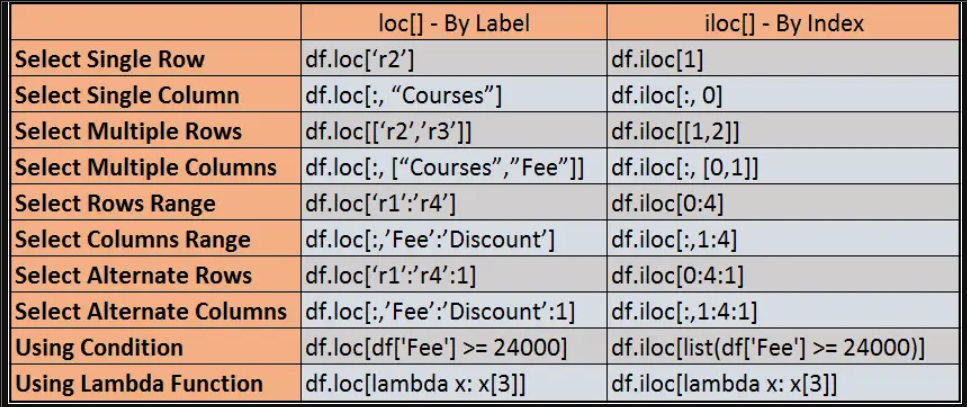

In [3]:
data = np.arange(20).reshape(5,4)
df = pd.DataFrame(data, columns = ["col1", "col2", "col3" , "col4"], index = range(1,6))
df

,col1,col2,col3,col4
1,0,1,2,3
2,4,5,6,7
3,8,9,10,11
4,12,13,14,15
5,16,17,18,19


In [ ]:
df.loc[3] #üçüncü satırı ismiyle çağırdık

col1     8
col2     9
col3    10
col4    11
Name: 3, dtype: int32

In [5]:
df.loc[2:5]

,col1,col2,col3,col4
2,4,5,6,7
3,8,9,10,11
4,12,13,14,15
5,16,17,18,19


In [6]:
df.index = ["a","b","c","d","e"]
df

,col1,col2,col3,col4
a,0,1,2,3
b,4,5,6,7
c,8,9,10,11
d,12,13,14,15
e,16,17,18,19


In [ ]:
df.loc[2:5] #hata verir, çünkü bunlar artık index label değil, index değeri

In [7]:
df.loc["b":"d"]

,col1,col2,col3,col4
b,4,5,6,7
c,8,9,10,11
d,12,13,14,15


In [ ]:
df.iloc[2:5] # iloc klasik defaultta çalışan  index numaraları üzerinden çalışır(0.,1,2,....gibi) 

,col1,col2,col3,col4
c,8,9,10,11
d,12,13,14,15
e,16,17,18,19


In [9]:
df.loc["b","col2"]

5

In [10]:
df.loc["b"]["col2"]

5

In [11]:
df.loc[["b"],["col2"]]

,col2
b,5


In [12]:
df.iloc[1,1]

5

In [13]:
df.loc["b":"d", ["col3","col4"]]

,col3,col4
b,6,7
c,10,11
d,14,15


In [14]:
df.loc["b":"d", "col3":"col4"]

,col3,col4
b,6,7
c,10,11
d,14,15


In [16]:
df.loc[["b","d","a"]]

,col1,col2,col3,col4
b,4,5,6,7
d,12,13,14,15
a,0,1,2,3


df.loc[["d","b", "c"]] [["col3", "col1"]] # liste ile istediğimiz satır ve sütun labellarını istediğimiz sırada yazdırdık

In [18]:
df.iloc[1:4,0]

b     4
c     8
d    12
Name: col1, dtype: int32

In [19]:
df.iloc[1:4,[0]]

,col1
b,4
c,8
d,12


In [20]:
df.iloc[1:4] #sadece satırlar

,col1,col2,col3,col4
b,4,5,6,7
c,8,9,10,11
d,12,13,14,15


In [21]:
df.iloc[1:4]["col4"]

b     7
c    11
d    15
Name: col4, dtype: int32

In [ ]:
df.loc[:,"col1":"col4":2] # .loc[bütün satırlar, start labelı:stop labelı:step

,col1,col3
a,0,2
b,4,6
c,8,10
d,12,14
e,16,18


## Conditional Selection

In [24]:
df = pd.DataFrame(np.random.randn(5,4), index = "a b c d e".split(), columns = ["A", "B", "C", "D"])
df

,A,B,C,D
a,-2.074635,0.123587,0.329532,-0.571758
b,0.506034,-0.341208,0.667347,1.649581
c,-0.625854,0.794491,1.523636,-0.937791
d,1.878271,1.443815,-2.018573,-0.174402
e,-2.705116,0.036160,1.440271,1.093904


In [25]:
df > 0

,A,B,C,D
a,False,True,True,False
b,True,False,True,True
c,False,True,True,False
d,True,True,False,False
e,False,True,True,True


In [26]:
df[df>0]

,A,B,C,D
a,NaN,0.123587,0.329532,NaN
b,0.506034,NaN,0.667347,1.649581
c,NaN,0.794491,1.523636,NaN
d,1.878271,1.443815,NaN,NaN
e,NaN,0.036160,1.440271,1.093904


In [27]:
df["A"] < 0

a     True
b    False
c     True
d    False
e     True
Name: A, dtype: bool

In [28]:
df[df["A"] < 0]

,A,B,C,D
a,-2.074635,0.123587,0.329532,-0.571758
c,-0.625854,0.794491,1.523636,-0.937791
e,-2.705116,0.036160,1.440271,1.093904


In [33]:
df[df["A"] < 0 ][["B"]]

,B
a,0.123587
c,0.794491
e,0.036160


In [34]:
df.loc[df["A"] < 0 ]

,A,B,C,D
a,-2.074635,0.123587,0.329532,-0.571758
c,-0.625854,0.794491,1.523636,-0.937791
e,-2.705116,0.036160,1.440271,1.093904
